### A. Изучить эволюционные алгоритмы оптимизации.

- Генетический алгоритм (https://pypi.org/project/geneticalgorithm/).

- Алгоритм роя частиц (https://pypi.org/project/pyswarm/).

- Алгоритм муравья (https://pypi.org/project/PyACO/).

- Пчелиный алгоритм (https://pypi.org/project/bees-algorithm/).

- Алгоритм дифференциальной эволюции (https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html).

### B. Решить задачу оптимизации многоэкстремальной функции, используя классический алгоритм оптимизации (например, алгоритм Ньютона) и эволюционный алгоритм.

1. Выполнить для каждого из 2 алгоритмов по 100 прогонов,вычислить математическое ожидание и дисперсию для финального значения функции соответствия (целевой функции) алгоритма оптимизации. Для эволюционных алгоритмов подобрать такие значения параметров, при которых значение дисперсии минимально.     
2. Оценить время, требуемое для получения априори известного значения глобального экстремума оптимизируемой функции при условии, что завершение работы эволюционного алгоритма осуществляется при достижении значения глобального экстремума.   
3. Для эволюционных алгоритмов оценить время нахождения последнего (возможно, локального) экстремума функции соответствия (целевой функции) при условии, что завершение работы алгоритма осуществляется при достижении максимального числа поколений. Вычислить математическое ожидание и дисперсию для времени нахождения последнего локального экстремума функции соответствия (целевой функции). Вычислить математическое ожидание и дисперсию для последнего локального экстремума функции соответствия (целевой функции). 
4. Выполнить визуализацию:
- для оптимизируемой функции (в трехмерном пространстве); 
- для значений функции соответствия (целевой функции) в зависимости от числа поколений в случае использования эволюционного алгоритма. 
5. Представить в табличном виде результаты расчетов для математического ожидания и дисперсии по значению функции соответствия (целевой функции) и по времени.

### C. Реализовать поиск оптимальных значений параметров для SVM, knn, RF-классификаторов с применением эволюционного алгоритма оптимизации.

In [1]:
%pip install geneticalgorithm

     -------------------------------------- 44.3/44.3 kB 723.9 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15081 sha256=e1c4bdfaf7b5ad70136765f720cbac90e245318c8d146fdb7b7b5ed0c4042733
  Stored in directory: c:\users\andrew\appdata\local\pip\cache\wheels\ba\84\2c\a167012c6ee32c8d45ed2faae8ea0ee5840d96c3b423f74e50
Successfully built func-timeout
Note: you may need to restart the kernel to use updated packages.


In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

import numpy as np
from scipy.optimize import differential_evolution
from scipy import optimize
from geneticalgorithm import geneticalgorithm as ga
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

import time

In [3]:
def sphere_func(x):
    return np.sum(x**2, axis=0)

C:\Users\Andrew\AppData\Local\Temp\ipykernel_12412\2093140978.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


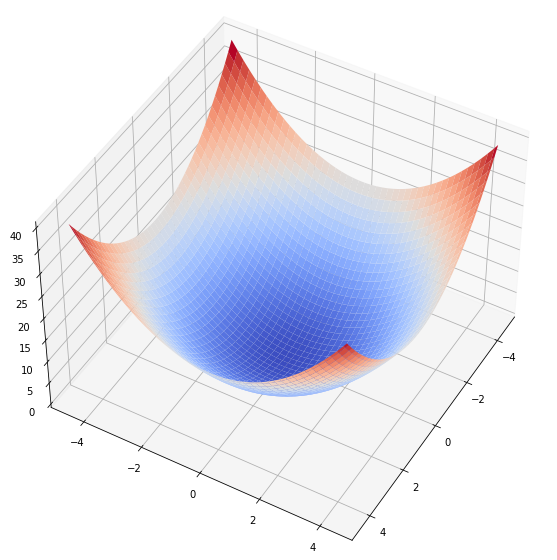

In [4]:
# Настраиваем 3D график
fig = plt.figure(figsize=[15, 10])
ax = fig.gca(projection='3d')

# Задаем угол обзора
ax.view_init(45, 30)

# Создаем данные для графика
X = np.arange(-4.5, 4.5, 0.1)
Y = np.arange(-4.5, 4.5, 0.1)
X, Y = np.meshgrid(X, Y)
Z = sphere_func(np.array([X,Y]))


# Рисуем поверхность
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
plt.show()

In [5]:
def calculate_mean(values):
    return np.mean(np.array([values,[0,0]]), axis=0)

def calculate_var(values):
    return np.var(np.array([values, [0,0]]), axis=0)

In [6]:
root = optimize.newton(func=sphere_func, x0=np.array([2,2]), maxiter=100)

print(f'root is: {root}')
print(f'mean is: {calculate_mean(root)}')
print(f'var is: {calculate_var(root)}')

root is: [1.95439407e-08 1.95439407e-08]
mean is: [9.77197037e-09 9.77197037e-09]
var is: [9.54914049e-17 9.54914049e-17]


 The best solution found:                                                                           
 [-1.06003229e-06 -6.23089972e-05]

 Objective function:
 3.883534797807136e-09


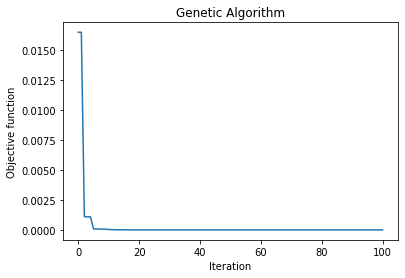

Report: {'variable': array([-1.06003229e-06, -6.23089972e-05]), 'function': 3.883534797807136e-09}
[-5.30016144e-07 -3.11544986e-05]
[2.80917113e-13 9.70602782e-10]


In [7]:
varbound=np.array([[-4.5,4.5]]*2)

algorithm_param = {'max_num_iteration': 100,\
                   'population_size':1000,\
                   'mutation_probability':0.2,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

model=ga(function=sphere_func,\
            dimension=2,\
            variable_type='real',\
            variable_boundaries=varbound,\
            algorithm_parameters=algorithm_param)

model.run()

variable_100 = model.output_dict.get('variable')

print(f'Report: {model.output_dict}')
print(calculate_mean(model.output_dict.get('variable')))
print(calculate_var(model.output_dict.get('variable')))

 The best solution found:                                                                           
 [-1.69025819e-09 -1.73772179e-08]

 Objective function:
 3.0482467487372204e-16


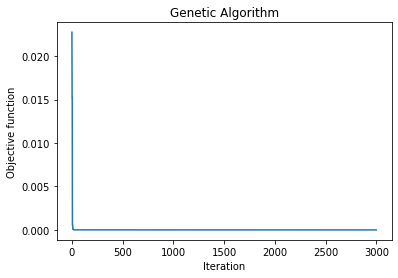

Report: {'variable': array([-1.69025819e-09, -1.73772179e-08]), 'function': 3.0482467487372204e-16}
[-8.45129095e-10 -8.68860895e-09]
[7.14243188e-19 7.54919255e-17]
Time spent: 595.3523478507996


In [8]:
start_time = time.time()

varbound=np.array([[-4.5,4.5]]*2)

algorithm_param = {'max_num_iteration': 3000,\
                   'population_size':1000,\
                   'mutation_probability':0.2,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

model=ga(function=sphere_func,dimension=2,variable_type='real',variable_boundaries=varbound)

model=ga(function=sphere_func,\
            dimension=2,\
            variable_type='real',\
            variable_boundaries=varbound,\
            algorithm_parameters=algorithm_param)

model.run()
end_time = time.time()

print(f'Report: {model.output_dict}')
print(calculate_mean(model.output_dict.get('variable')))
print(calculate_var(model.output_dict.get('variable')))

variable_3000 = model.output_dict.get('variable')

print(f'Time spent: {end_time - start_time}')

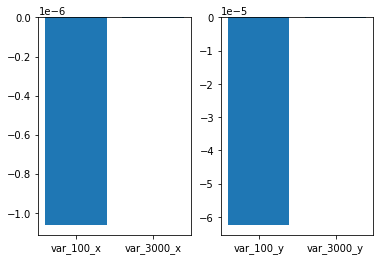

In [9]:
fig, axs = plt.subplots(1,2)

axs[0].bar(['var_100_x', 'var_3000_x'], [variable_100[0], variable_3000[0]], label=['100', '3000'])
axs[1].bar(['var_100_y', 'var_3000_y'], [variable_100[1], variable_3000[1]], label=['100', '3000'])

plt.show()

In [10]:
df = pd.read_csv('haberman.data', sep=',', 
                 usecols=["Age","Patient's year of operation","Number of positive axillary nodes detected","Survival status"])

In [11]:
df

,Age,Patient's year of operation,Number of positive axillary nodes detected,Survival status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [12]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X = X.to_numpy()
y = y.to_numpy()

scaler = StandardScaler().fit(X)

X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [13]:
def find_params_svc(X):
    model = SVC(C=int(X[0]), kernel=['linear', 'sigmoid','rbf', 'poly'][int(X[1])])
    model.fit(X_train, y_train)
    return -accuracy_score(y_test, model.predict(X_test))

In [14]:
def find_params_knn(X):
    model = KNeighborsClassifier(n_neighbors=int(X[0]), metric=['euclidean', 'manhattan'][int(X[1])])
    model.fit(X_train, y_train)
    return -accuracy_score(y_test, model.predict(X_test))

In [15]:
def find_params_rf(X):
    model = RandomForestClassifier(n_estimators=int(X[0]), max_depth=int(X[1]))
    model.fit(X_train, y_train)
    return -accuracy_score(y_test, model.predict(X_test))

 The best solution found:                                                                           
 [15.  1.]

 Objective function:
 -0.6935483870967742


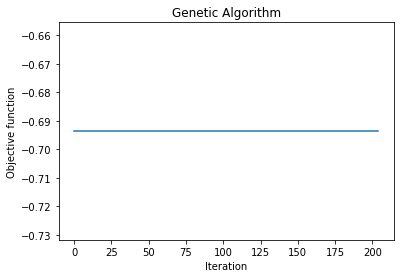

In [16]:
varbound=np.array([[1,100],[0,3]])

algorithm_param = {'max_num_iteration': None,\
                   'population_size':100,\
                   'mutation_probability':0.1,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

model=ga(function=find_params_svc,\
            dimension=2,\
            variable_type='int',\
            variable_boundaries=varbound,\
            algorithm_parameters=algorithm_param)

model.run()

 The best solution found:                                                                           
 [3. 1.]

 Objective function:
 -0.6935483870967742


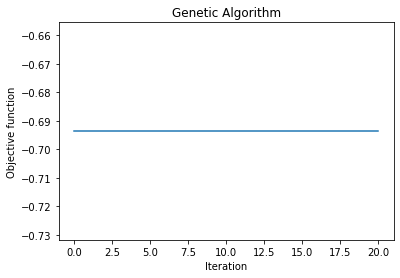

In [17]:
varbound=np.array([[1,10],[0,1]])


algorithm_param = {'max_num_iteration': None,\
                   'population_size':100,\
                   'mutation_probability':0.1,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

model=ga(function=find_params_knn,\
            dimension=2,\
            variable_type='int',\
            variable_boundaries=varbound,\
            algorithm_parameters=algorithm_param)

model.run()

In [ ]:
varbound=np.array([[100,150],[10,15]])

algorithm_param = {'max_num_iteration': None,\
                   'population_size':100,\
                   'mutation_probability':0.1,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

model=ga(function=find_params_rf,\
            dimension=2,\
            variable_type='int',\
            variable_boundaries=varbound,\
            algorithm_parameters=algorithm_param)

model.run()

|||||||||||||||||||||||||||||||||||||||||||||||||| 99.1% GA is running...